### 이차원 데이터를 활용한 계층적 군집분석

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
X = np.array([[5,3],
              [10,15],
              [15,12],
              [24,10],
              [30,30],
              [85,70],
              [71,80],
              [60,78],
              [70,55],
              [80,91]])

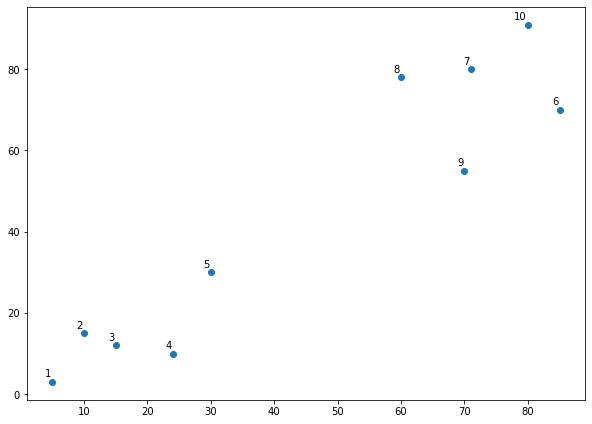

In [14]:
# 데이터 시각화
labels = range(1,11)
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0], X[:,1], label='True Position')

for label, x, y in zip(labels, X[:,0], X[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-1,3), textcoords='offset points', ha='right', va='bottom')

plt.show()

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, 'single')

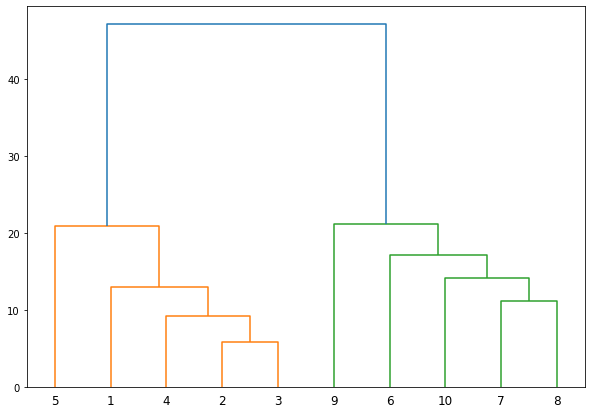

In [16]:
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show()

### 쇼핑데이터를 활용한 계층적 군집분석

In [17]:
customer_data = pd.read_csv('./data/shopping-data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
# Annual Income 과 Spending Score 만 데이터 추출
data = customer_data.iloc[:,3:5].values

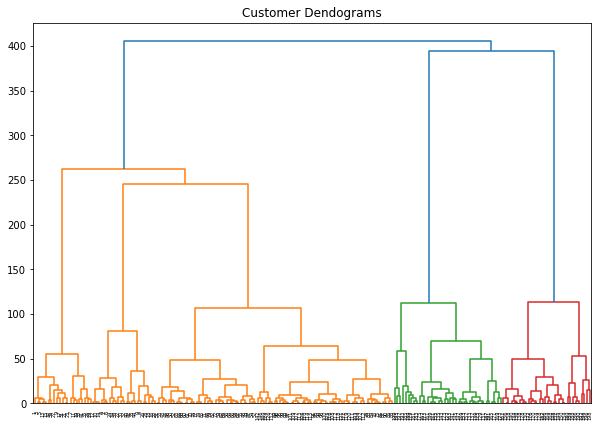

In [23]:
# Dendogram 생성 및 시각화
plt.figure(figsize=(10, 7))
plt.title('Customer Dendograms')
dend = dendrogram(linkage(data, method='ward'))
# 하위 군집은 잘게 쪼게어져서 구분이 어려워 병합군집을 수행해서 시각화 필요

### 병합군집의 적용

In [26]:
from sklearn.cluster import AgglomerativeClustering
# 병합군집은 군집갯수만큼 직전단계의 각 군집과 거리가 최근접한 데이터를 반복적으로 군집해나가는 방법 
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

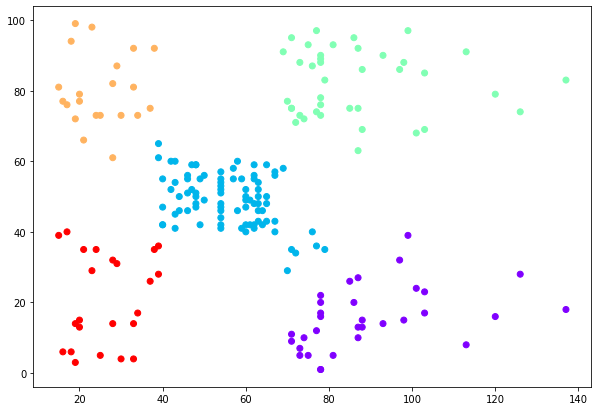

In [25]:
# 병합군집 시각화
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

### Boston house 집값 데이터를 활용한 계층적 군집분석

In [29]:
# 데이터 불러오기
data = pd.read_csv('./data/Boston_house.csv')

'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율
'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율\n'

In [30]:
# 데이터 확인
data.head() 

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [31]:
target = data['Target']
data = data.drop(['Target'], axis=1)

In [32]:
data.shape

(506, 13)

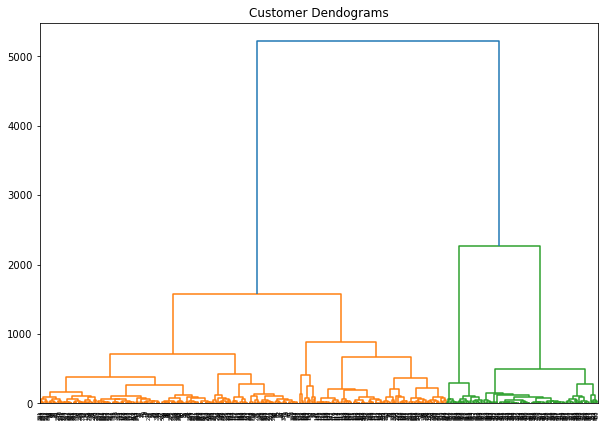

In [34]:
# 계층적 군집분석 시각화를 위한 Linkage 연결과 Dendogram 생성
plt.figure(figsize=(10,7))
plt.title('Customer Dendograms')
dend = dendrogram(linkage(data, method='ward'))
# 하위 군집은 잘게 쪼게어져서 구분이 어려워 병합군집을 수행해서 시각화 필요

In [39]:
# 병합분석 수행

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**'0'과 '1'로 군집된데이터 통계치 추출 및 분석**

In [36]:
# '0' 라벨으로 할당된 target값(집값)의 평균
np.mean([x for x, y in zip(target, cluster.fit_predict(data)) if y == 0])

16.272262773722627

In [41]:
# '1' 라벨으로 할당된 target값(집값)의 평균
np.mean([x for x, y in zip(target, cluster.fit_predict(data)) if y == 1])

24.857181571815715

In [43]:
# '0' 라벨으로 할당된 data의 통계값을 추출
data.iloc[cluster.fit_predict(data)==0, :].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,137.000000,137.000000,137.000000,137.000000,137.00000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0,137.000000,137.000000
mean,89.967883,291.039051,6.006212,12.299162,2.05447,18.451825,18.674526,0.670102,20.196350,23.270073,0.0,667.642336,0.058394
std,12.469840,144.089867,0.713021,13.017296,0.60790,1.814342,6.873577,0.061051,0.018821,3.764196,0.0,8.469441,0.235348
min,40.300000,0.320000,3.561000,0.105740,1.12960,18.100000,2.960000,0.532000,20.100000,4.000000,0.0,666.000000,0.000000
25%,86.100000,210.970000,5.683000,5.441140,1.58950,18.100000,14.190000,0.614000,20.200000,24.000000,0.0,666.000000,0.000000
50%,94.500000,374.560000,6.152000,8.716750,1.92650,18.100000,18.050000,0.693000,20.200000,24.000000,0.0,666.000000,0.000000
75%,98.800000,395.280000,6.411000,14.236200,2.36820,18.100000,23.240000,0.713000,20.200000,24.000000,0.0,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,4.09830,27.740000,37.970000,0.770000,20.200000,24.000000,0.0,711.000000,1.000000


In [44]:
# '1' 라벨으로 할당된 data의 통계값을 추출
data.iloc[cluster.fit_predict(data)==1, :].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,60.632249,381.042575,6.388005,0.388774,4.441272,8.420894,10.417453,0.511847,17.809214,4.455285,15.582656,311.926829,0.073171
std,28.217681,39.567014,0.670817,0.628724,2.097985,6.004356,5.831720,0.101241,2.210135,1.643095,26.086641,67.828288,0.260770
min,2.900000,70.800000,4.903000,0.006320,1.321600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,35.900000,383.780000,5.933000,0.057890,2.714700,4.000000,6.120000,0.437000,16.400000,4.000000,0.000000,270.000000,0.000000
50%,62.200000,392.780000,6.245000,0.131580,4.052200,6.410000,9.380000,0.493000,17.900000,4.000000,0.000000,304.000000,0.000000
75%,88.000000,396.330000,6.727000,0.369200,5.873600,10.010000,13.280000,0.544000,19.200000,5.000000,22.000000,384.000000,0.000000
max,100.000000,396.900000,8.725000,4.097400,12.126500,25.650000,34.410000,0.871000,22.000000,8.000000,100.000000,469.000000,1.000000


In [ ]:
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율

In [46]:
"""
'0'과 '1' 군집 간의 특징을 비교하면, 큰 차이를 보이는 변수들은 아래와 같다.

[평균] 
CRIM(범죄율), INDUS(비소매상업지역 면적비율), LSTAT(하위계층비율), RAD(고속도로까지 거리), TAX(재산세율)

[중위값(50%)]
AGE(오래된 주택비율), CRIM(범죄율), DIS(직업센터거리), INDUS(비소매상업지역 면적비율),
LSTAT(하위계층비율), RAD(고속도로까지 거리), TAX(재산세율)

=> 위의 독립변수(입력변수)는 집값에 영향을 줄 수 있다고 추정가능하다.

=> 클러스터링은 출력변수(Y, target)없이 입력변수(X, input)만으로도 군집화가 가능한 방법이며, 
군집화된 데이터를 통해서 각 군집간의 관계나 군집에 할당된 데이터의 특징을 파악할 수 있다.
"""

"\n'0'과 '1' 군집 간의 특징을 비교하면, 큰 차이를 보이는 변수들은 아래와 같다.\n\n[평균] \nCRIM(범죄율), INDUS(비소매상업지역 면적비율), LSTAT(하위계층비율), RAD(고속도로까지 거리), TAX(재산세율)\n\n[중위값(50%)]\nAGE(오래된 주택비율), CRIM(범죄율), DIS(직업센터거리), INDUS(비소매상업지역 면적비율),\nLSTAT(하위계층비율), RAD(고속도로까지 거리), TAX(재산세율)\n\n=> 위의 독립변수(입력변수)는 집값에 영향을 줄 수 있다고 추정가능하다.\n\n=> 클러스터링은 출력변수(Y, target)없이 입력변수(X, input)만으로도 군집화가 가능한 방법이며, \n군집화된 데이터를 통해서 각 군집간의 관계나 군집에 할당된 데이터의 특징을 파악할 수 있다.\n"